# Avacado Project
Problem Statement:


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
avocado_ds = pd.read_csv("avocado.csv")

In [4]:
avocado_ds.head() # checking top 5 observations

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
avocado_ds.tail()# checking last 5 observations

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
avocado_ds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [7]:
# deleting the unnamed column from the dataset as it has its own index
avocado_ds.drop("Unnamed: 0",axis=1, inplace = True)

In [8]:
print(avocado_ds.shape)
print(avocado_ds.columns)

(16468, 13)
Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


In [9]:
avocado_ds_work_file = avocado_ds.copy()

In [10]:
avocado_ds_work_file.replace({"NaN": np.nan},inplace=True)

In [12]:
def missing_val(x):
  missing = {}
  for i in avocado_ds_work_file.columns:
    if avocado_ds_work_file[i].isnull().sum()> 0:
      missing[i] = avocado_ds_work_file[i].isnull().sum()
  print(missing,end = " ")

In [13]:
# calling the function
missing_val(avocado_ds_work_file)
print("\n")
print("Percentage of missing data:\n",avocado_ds_work_file.isnull().sum()/len(avocado_ds_work_file)*100)

{'Date': 14951, 'AveragePrice': 14951, 'Total Volume': 14951, '4046': 14951, '4225': 14951, '4770': 14951, 'Total Bags': 14951, 'Small Bags': 14951, 'Large Bags': 14951, 'XLarge Bags': 14951, 'type': 14951, 'year': 14951, 'region': 14951} 

Percentage of missing data:
 Date            90.788195
AveragePrice    90.788195
Total Volume    90.788195
4046            90.788195
4225            90.788195
4770            90.788195
Total Bags      90.788195
Small Bags      90.788195
Large Bags      90.788195
XLarge Bags     90.788195
type            90.788195
year            90.788195
region          90.788195
dtype: float64


In [14]:
avocado_ds_work_file.dropna(inplace=True)
missing_val(avocado_ds_work_file) 

{} 

In [15]:
avocado_ds_work_file["Date"] = pd.to_datetime(avocado_ds_work_file["Date"])
avocado_ds_work_file.dtypes

C:\Users\kisho\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kisho\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kisho\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kisho\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-11-2015' in DD/MM/YYYY format. Provide format or specif

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [16]:
# updating original files
avocado_ds = avocado_ds_work_file.copy()

In [17]:
# updating original files
avocado_ds = avocado_ds_work_file.copy()

In [18]:
avocado_ds.select_dtypes(include="object").describe()

,type,region
count,1517,1517
unique,1,51
top,conventional,California
freq,1517,76


# EDA

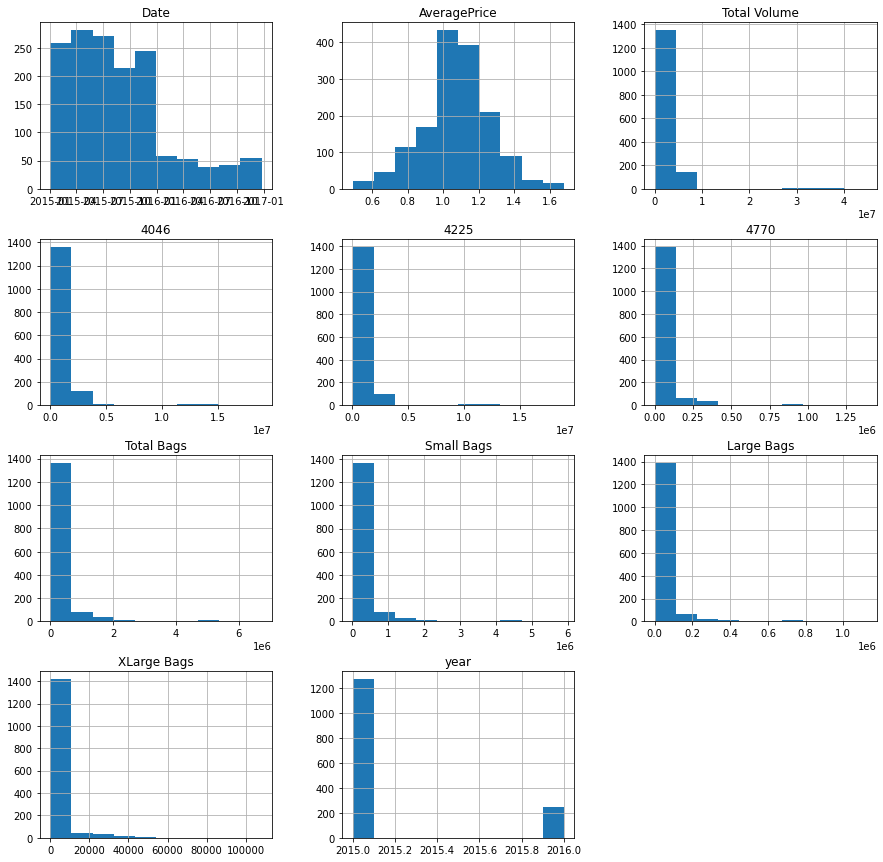

In [19]:
avocado_ds.select_dtypes(exclude="object").hist(figsize= (15,15)); 

In [20]:
avocado_ds.rename(columns={"4046":"PLU_4046","4225":"PLU_4225","4770":"PLU_4770"},inplace=True)
avocado_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [23]:
num_data = avocado_ds[["Total Volume","PLU_4046","PLU_4225","PLU_4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]

In [24]:
# checking the skewness
num_data.skew()

Total Volume    6.200138
PLU_4046        6.051830
PLU_4225        6.394926
PLU_4770        5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
dtype: float64

In [25]:
avocado_ds_analysis_data = avocado_ds.copy()

In [26]:
avocado_ds_analysis_data["Date"] = pd.to_datetime(avocado_ds_analysis_data["Date"],format = "%d/%m/%Y") 
avocado_ds_analysis_data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_4046               float64
PLU_4225               float64
PLU_4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [27]:
avocado_ds_analysis_data["Day"] =  avocado_ds_analysis_data["Date"].dt.day
avocado_ds_analysis_data["year"] =  avocado_ds_analysis_data["Date"].dt.year
avocado_ds_analysis_data["Month"] =  avocado_ds_analysis_data["Date"].dt.month
avocado_ds_analysis_data["week"] =  avocado_ds_analysis_data["Date"].dt.week
avocado_ds_analysis_data.head()

C:\Users\kisho\AppData\Local\Temp\ipykernel_43156\2166925251.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  avocado_ds_analysis_data["week"] =  avocado_ds_analysis_data["Date"].dt.week


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,50
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,24
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,48


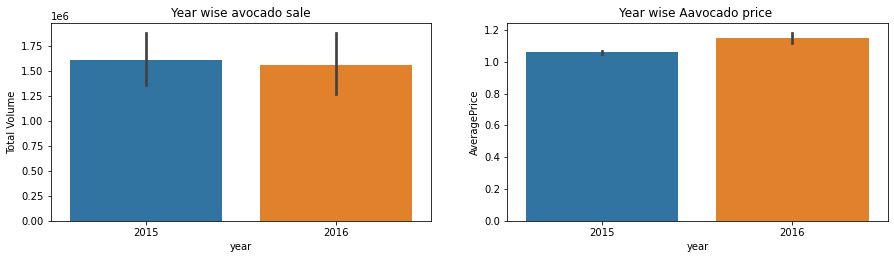

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(x = "year", y = "Total Volume", data = avocado_ds_analysis_data)
plt.title("Year wise avocado sale");

plt.subplot(222)
sns.barplot(x = "year", y = "AveragePrice", data = avocado_ds_analysis_data)
plt.title("Year wise Aavocado price ");

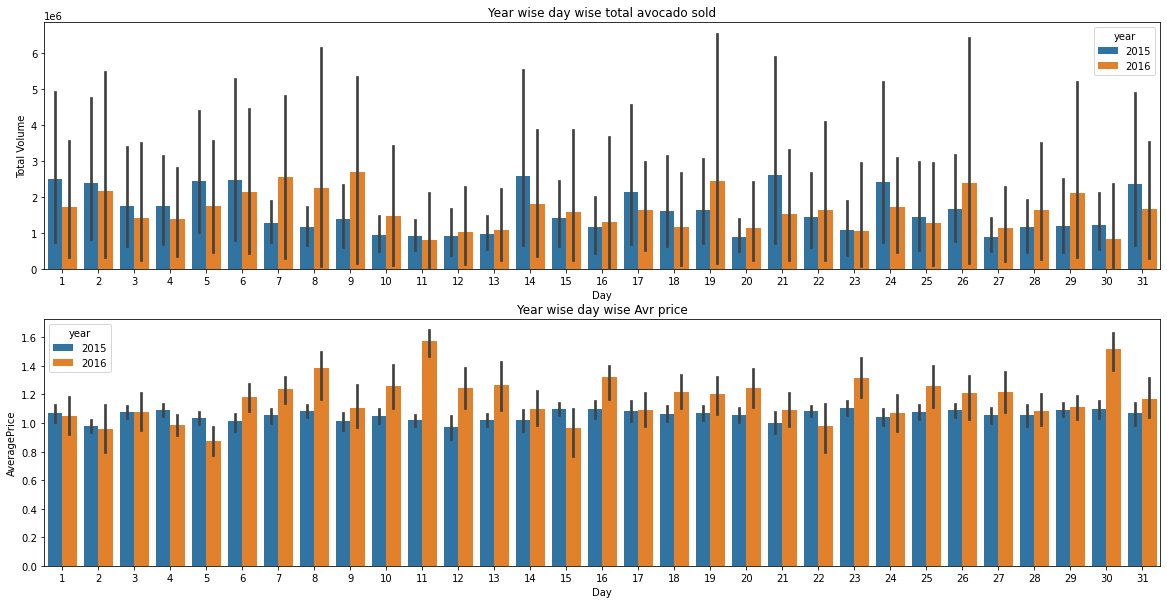

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Day", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise total avocado sold");

plt.subplot(212)
sns.barplot(x = "Day", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise Avr price");

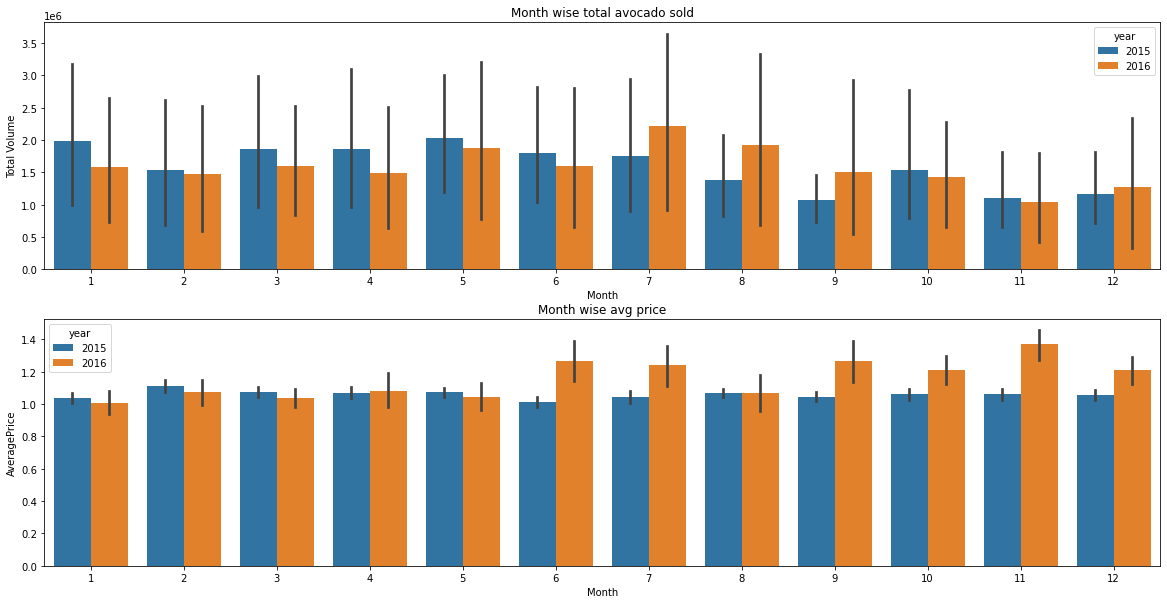

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Month", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "Month", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise avg price");

Text(0.5, 1.0, 'week wise avg price')

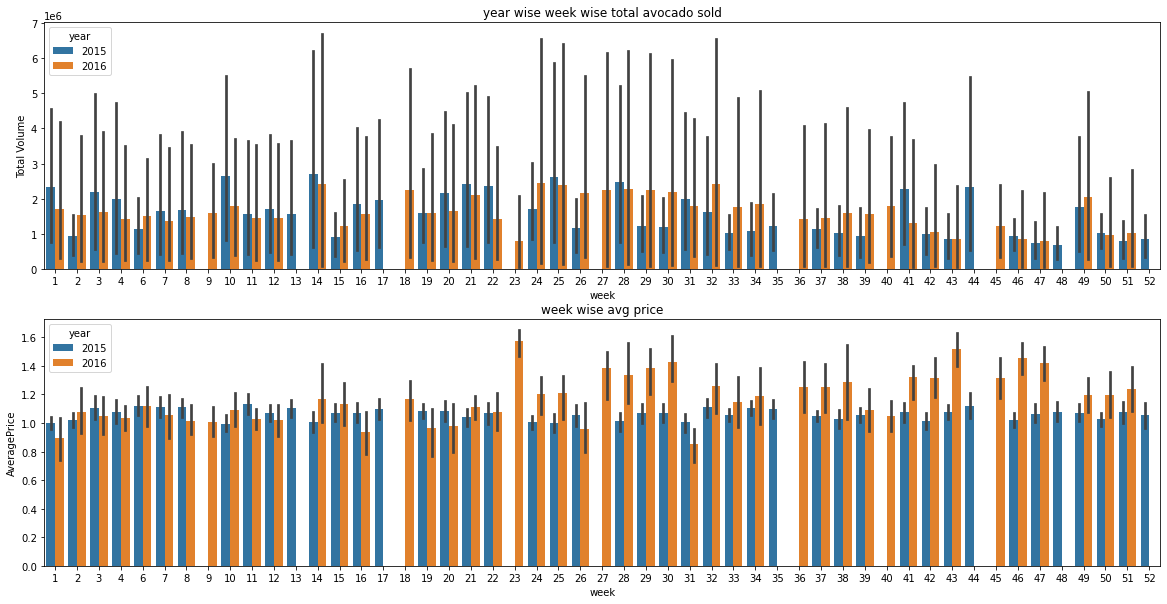

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "week", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("year wise week wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "week", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("week wise avg price")

In [32]:
avocado_ds.groupby("region")[["Total Volume","AveragePrice"]].mean().sort_values(by ="Total Volume" ,ascending = False)

,Total Volume,AveragePrice
region,,
TotalUS,3.293714e+07,1.011600
California,6.035277e+06,1.055921
West,5.574939e+06,0.940833
SouthCentral,5.496995e+06,0.818718
Northeast,3.465864e+06,1.236667
GreatLakes,3.276358e+06,1.107222
Southeast,3.055239e+06,1.091111
LosAngeles,2.732180e+06,0.863333
Midsouth,2.355099e+06,1.081111


In [33]:
avocado_ds.drop(columns=["Small Bags","Large Bags"],axis = 1, inplace = True)


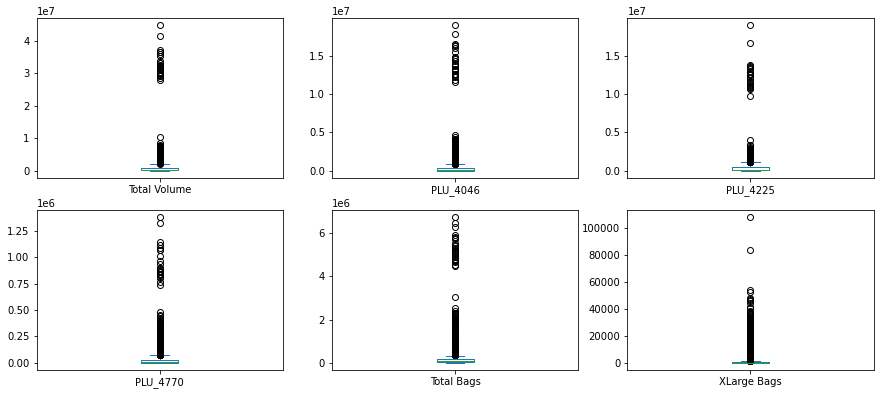

In [34]:
num_data = avocado_ds_analysis_data[["Total Volume","PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","XLarge Bags"]]

num_data.plot(kind = "box", subplots = True, layout=(3,3), figsize = (15,10));


# Label Encoding


In [35]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

lb = LabelEncoder()
lb.fit(avocado_ds["region"])

avocado_ds["region"] = lb.transform(avocado_ds["region"])

In [36]:
avocado_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,conventional,2015.0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,conventional,2015.0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,conventional,2015.0,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,conventional,2015.0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,conventional,2015.0,0


In [37]:
avocado_ds.tail(10)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
1507,2016-11-20,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,0.00,conventional,2016.0,7
1508,2016-11-13,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,0.00,conventional,2016.0,7
1509,2016-06-11,1.57,142095.92,36840.74,27501.34,25305.86,52447.98,0.00,conventional,2016.0,7
1510,2016-10-30,1.58,142955.49,39376.44,29382.30,26881.22,47315.53,240.28,conventional,2016.0,7
1511,2016-10-23,1.52,167741.27,54981.90,39749.81,20290.31,52719.25,0.00,conventional,2016.0,7
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,conventional,2016.0,7
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,0.00,conventional,2016.0,7
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,conventional,2016.0,7
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,conventional,2016.0,7
1516,2016-09-18,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,0.00,conventional,2016.0,7


In [38]:
# Treating the outlier with zscore and delete the date and year columns, i kept it for EDA purpose.
avocado_ds.drop(columns=["Date","year","type"],axis = 1,inplace = True)

score = np.abs(zscore(avocado_ds))

new_avocado_ds = avocado_ds[(score <3).all(axis = 1)]

In [40]:
from sklearn.preprocessing import power_transform
select_data =new_avocado_ds[["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"]]

print("before",select_data.skew())
select_data = power_transform(select_data,method='yeo-johnson', standardize=False)
tranform_data = pd.DataFrame(select_data)
print("after",tranform_data.skew())

before PLU_4046       2.975422
PLU_4225       2.276566
PLU_4770       3.205071
XLarge Bags    4.922540
dtype: float64
after 0   -0.026799
1    0.000982
2   -0.056341
3    0.466782
dtype: float64


In [42]:

# checking the name of the columsn becaue after power_transform it get convert into numpy array and index value assigned to columns.
tranform_data.rename(columns = {0:"trans_PLU_4046",1:"trans_PLU_4225",2:"trans_PLU_4770",3:"trans_Xlarge Bags"}, inplace = True)
# joining transformed data 

new_avocado_ds = pd.concat([new_avocado_ds,tranform_data],axis = 1,join = "inner")

# since transformed features are added in the data so we need to deleted original one to avoid duplicacy
new_avocado_ds.drop(columns =["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"],axis =1, inplace =True)


In [43]:
new_avocado_ds.skew()

AveragePrice        -0.255823
Total Volume         2.695689
Total Bags           2.962352
region               0.229088
trans_PLU_4046      -0.034920
trans_PLU_4225      -0.010051
trans_PLU_4770      -0.054778
trans_Xlarge Bags    0.508620
dtype: float64

In [44]:
new_avocado_ds["Total Volume"] = np.log1p(new_avocado_ds["Total Volume"])
new_avocado_ds["Total Bags"] = np.log1p(new_avocado_ds["Total Bags"])
new_avocado_ds.skew()

AveragePrice        -0.255823
Total Volume         0.430677
Total Bags           0.293345
region               0.229088
trans_PLU_4046      -0.034920
trans_PLU_4225      -0.010051
trans_PLU_4770      -0.054778
trans_Xlarge Bags    0.508620
dtype: float64

<AxesSubplot:>

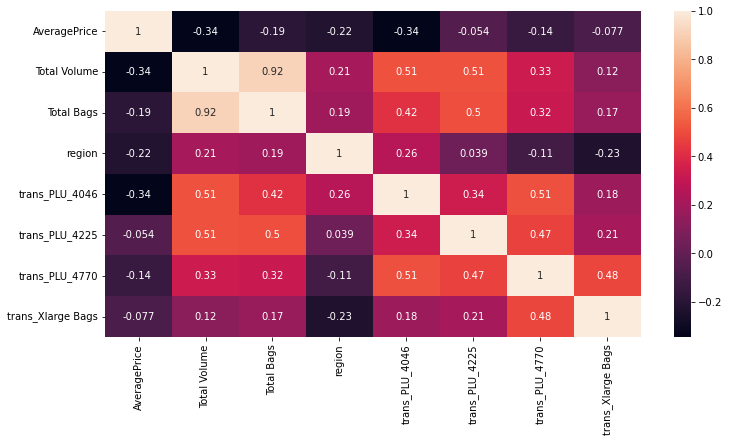

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True)

In [46]:
new_avocado_dsX_check = new_avocado_ds.copy()

In [47]:
new_avocado_ds.drop("Total Bags",axis =1, inplace = True)

<AxesSubplot:>

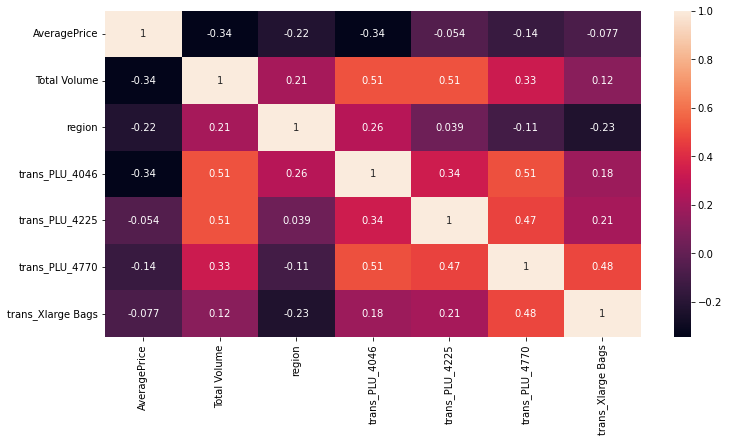

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True)

# Data is ready for "Modeling"

In [49]:
X = new_avocado_ds.drop("AveragePrice",axis =1)
y =new_avocado_ds["AveragePrice"]

In [50]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [51]:
for i in range(50,500,75):
    LR = LinearRegression()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    LR.fit(X_train,y_train)
    print("Training_score",LR.score(X_train,y_train),"Random_state",i)
    pred = LR.predict(X_test)
    print("test_score",LR.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.19869838820001762 Random_state 50
test_score 0.1995176979589789
Mean_squared_error 0.02549721425154033
R2_scoe 0.1995176979589789 

Training_score 0.1967985178696946 Random_state 125
test_score 0.20419587059792488
Mean_squared_error 0.027086035563694807
R2_scoe 0.20419587059792488 

Training_score 0.20587630233707288 Random_state 200
test_score 0.16139288717246147
Mean_squared_error 0.024883901646120817
R2_scoe 0.16139288717246147 

Training_score 0.19752381356218496 Random_state 275
test_score 0.2027497810184885
Mean_squared_error 0.02567006036086617
R2_scoe 0.2027497810184885 

Training_score 0.19179433425027548 Random_state 350
test_score 0.21839490373146186
Mean_squared_error 0.028297682254727945
R2_scoe 0.21839490373146186 

Training_score 0.2180441716562086 Random_state 425
test_score 0.10714957624331034
Mean_squared_error 0.027600444623727533
R2_scoe 0.10714957624331034 



In [52]:
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9623809630331692 Random_state 50
test_score 0.7401883044138402
Mean_squared_error 0.008275603908450706
R2_scoe 0.7401883044138402 

Training_score 0.9660236683246095 Random_state 100
test_score 0.6980602202133581
Mean_squared_error 0.009926163943661984
R2_scoe 0.6980602202133581 

Training_score 0.9617246445167223 Random_state 150
test_score 0.7446494190915389
Mean_squared_error 0.010334602746478872
R2_scoe 0.7446494190915389 

Training_score 0.9657843033546463 Random_state 200
test_score 0.7028975047519175
Mean_squared_error 0.008815891443661968
R2_scoe 0.7028975047519175 

Training_score 0.9607883732383234 Random_state 250
test_score 0.7251786193061025
Mean_squared_error 0.009827681197183092
R2_scoe 0.7251786193061025 

Training_score 0.9636247075060475 Random_state 300
test_score 0.7299940702651296
Mean_squared_error 0.009595858626760545
R2_scoe 0.7299940702651296 

Training_score 0.9638552337187631 Random_state 350
test_score 0.7500828313282308
Mean_squared_error 0

In [53]:
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9627830083884357 Random_state 50
test_score 0.747352920685274
Mean_squared_error 0.008047394295774647
R2_scoe 0.747352920685274 

Training_score 0.9656649663076535 Random_state 100
test_score 0.6864558737843278
Mean_squared_error 0.01030765274647888
R2_scoe 0.6864558737843278 

Training_score 0.9611081101192555 Random_state 150
test_score 0.7438320542364831
Mean_squared_error 0.010367683309859156
R2_scoe 0.7438320542364831 

Training_score 0.9657681205844558 Random_state 200
test_score 0.7064057271953408
Mean_squared_error 0.008711792323943661
R2_scoe 0.7064057271953408 

Training_score 0.9614770395848392 Random_state 250
test_score 0.7299131360225353
Mean_squared_error 0.009658373697183083
R2_scoe 0.7299131360225353 

Training_score 0.9637476384808333 Random_state 300
test_score 0.7294591923275081
Mean_squared_error 0.00961486788732393
R2_scoe 0.7294591923275081 

Training_score 0.9642520371123169 Random_state 350
test_score 0.7442507406074634
Mean_squared_error 0.009

In [54]:
models = [LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for model in models:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2, random_state =450)
    model.fit(X_train,y_train)
    print("Training_score",model.score(X_train,y_train),"Algorithm",model)
    pred = model.predict(X_test)
    print("test_score",model.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.19985775947811701 Algorithm LinearRegression()
test_score 0.1905580240093907
Mean_squared_error 0.02504986875281353
R2_scoe 0.1905580240093907 

Training_score 0.19985755925334336 Algorithm Ridge()
test_score 0.19053662764134027
Mean_squared_error 0.025050530908010994
R2_scoe 0.19053662764134027 

Training_score 0.0 Algorithm Lasso()
test_score -0.0039917765760231205
Mean_squared_error 0.03107061775657807
R2_scoe -0.0039917765760231205 

Training_score 0.9657093590656514 Algorithm RandomForestRegressor()
test_score 0.7698957626795422
Mean_squared_error 0.007121055140845076
R2_scoe 0.7698957626795422 

Training_score 0.5890406817810396 Algorithm AdaBoostRegressor()
test_score 0.5237825294820453
Mean_squared_error 0.014737542020442498
R2_scoe 0.5237825294820453 

Training_score 1.0 Algorithm DecisionTreeRegressor()
test_score 0.5685729715696848
Mean_squared_error 0.013351408450704223
R2_scoe 0.5685729715696848 

Training_score 0.6713738765896875 Algorithm SVR()
test_scor

In [59]:
RF = RandomForestRegressor()
para = {"n_estimators":[100,200,300],
       "max_depth":[2,3,4,5],
       "max_features":["auto", "sqrt", "log2"]}

grid_search_RF = GridSearchCV(RF,para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_RF.fit(X_train1,y_train1)
print(grid_search_RF.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}


In [60]:
grid_search_RF.best_score_

0.5788871002041656

In [61]:
knn = KNeighborsRegressor()
grid_para = {"n_neighbors":[5,7,10,12],
            "weights":["uniform", "distance"],
            "algorithm" :["auto", "ball_tree", "kd_tree", "brute"],
            "p" :[1,2]}
grid_search_KNN = GridSearchCV(knn,grid_para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_KNN.fit(X_train1,y_train1)
print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [62]:
grid_search_KNN.best_score_

0.706584416718475

In [63]:
best_RF = RandomForestRegressor(max_depth = 5,max_features="auto",n_estimators =200)

for i in range(2,10):
    cross_val_report = cross_val_score(best_RF,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())



At 2 mean is  -0.04960754228907262 and the SD is  0.009896697013880757
At 3 mean is  -0.03386407199445488 and the SD is  0.007879077402134439
At 4 mean is  -0.03903495443201924 and the SD is  0.016797148079127185
At 5 mean is  -0.0351863388202413 and the SD is  0.016974111752966675
At 6 mean is  -0.03497812141084874 and the SD is  0.014522895105238208
At 7 mean is  -0.029726106247037858 and the SD is  0.017702144920251968
At 8 mean is  -0.031182141740005748 and the SD is  0.018844255457652462
At 9 mean is  -0.03146404575169428 and the SD is  0.02259875270925185


In [64]:
best_knn =  knn = KNeighborsRegressor(algorithm ="auto",p =1,weights = "distance")

for i in range(2,10):
    cross_val_report = cross_val_score(best_knn,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())


At 2 mean is  -0.04040044654546724 and the SD is  0.0031320660153354996
At 3 mean is  -0.040694879423680955 and the SD is  0.004987851991341175
At 4 mean is  -0.032501614934171294 and the SD is  0.011919421727307734
At 5 mean is  -0.0365731160952418 and the SD is  0.011795255656627177
At 6 mean is  -0.0353383949449379 and the SD is  0.008468625864483617
At 7 mean is  -0.037960890643166524 and the SD is  0.013207479031555384
At 8 mean is  -0.03191588173693921 and the SD is  0.01596983975715626
At 9 mean is  -0.041492109806076455 and the SD is  0.02899200478721475



# Modeling saving

In [67]:
best_knn.fit(X,y)
import pickle
filename = "Avocado.pkl"
with open(filename,"wb") as f:
    pickle.dump(best_knn,f)